<a href="https://colab.research.google.com/github/EjbejaranosAI/AI_trends_2023/blob/main/Flava_implementaiton_pytorchMultimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flava implementation with mulitmodalpytorch libraries

https://paperswithcode.com/method/flava

In [2]:
import sys
import os
colab = 'google.colab' in sys.modules
if colab:
  !pip install -q torchmultimodal-nightly
  !pip install -q datasets

In [4]:
from torchvision.transforms.functional import InterpolationMode
from torchvision import transforms

mean = [
        0.4814,
        0.4578,
        0.40821
    ]

std = [
    0.2686,
    0.261302,
    0.275777
    ]

image_transforms = transforms.Compose([
      transforms.Resize((224,224),interpolation=InterpolationMode.BICUBIC),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=mean,
          std=std,
          ),
      ])

In [8]:
from torchmultimodal.transforms.bert_text_transform import BertTextTransform
text_transform = BertTextTransform()

100%|██████████| 232k/232k [00:00<00:00, 7.39MB/s]


In [11]:
from torchmultimodal.models.flava.model import flava_model

zero_shot_model = flava_model(pretrained_model_key='flava_full')
zero_shot_model.eval()


FLAVAModel(
  (image_encoder): ImageTransformer(
    (embeddings): ImageEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): TransformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x TransformerEncoderLayer(
          (attention): MultiHeadAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (output): Linear(in_features=768, out_features=768, bias=True)
            (attn): SelfAttention()
          )
          (attention_dropout): Dropout(p=0.0, inplace=False)
          (feedforward): MLP(
            (model): Sequential(
              (0): Linear(in_features=768, out_features=3072, bias=True)
              (1): GELU(approximate='none')
 

torch.Size([1, 3, 224, 224])
image feature , tensor([[ 5.4949e-01, -9.5278e-01, -1.0561e+00,  3.3474e-01,  5.4463e-01,
         -1.9186e-01, -4.2870e-01,  5.6470e-01,  9.3149e-01, -1.9887e-01,
         -3.5037e-01,  3.0514e-01,  5.5317e-02, -1.2269e-01,  6.9893e-02,
          5.8848e-01, -2.0119e-01, -4.6866e-01,  3.1056e-01, -1.5850e-01,
         -9.1408e-01, -5.5512e-02,  1.0957e+00, -6.7765e-01, -1.6287e-01,
          2.3001e-01,  3.0871e-01, -5.6009e-01, -3.4718e-01,  1.2845e+00,
         -9.4935e-01, -5.1049e-02, -8.0509e-01, -3.4414e-01, -3.8187e-01,
          4.1459e-01, -1.0565e+00, -3.3876e-01, -4.2825e-01,  1.7116e-01,
         -1.1384e-01,  8.3795e-01,  8.0027e-01,  9.8588e-02,  4.9537e-01,
         -4.1968e-02,  5.2742e-01, -6.7803e-01, -1.7446e-01, -6.4720e-01,
          1.1326e-01, -4.1280e-01,  1.2906e-01, -1.0719e-01, -4.0301e-01,
          2.6219e-01,  3.8166e-01,  1.9046e-01,  4.8156e-01, -1.1189e+00,
         -9.8013e-02, -1.9049e-01, -4.3230e-01,  3.3856e-01, -9.343

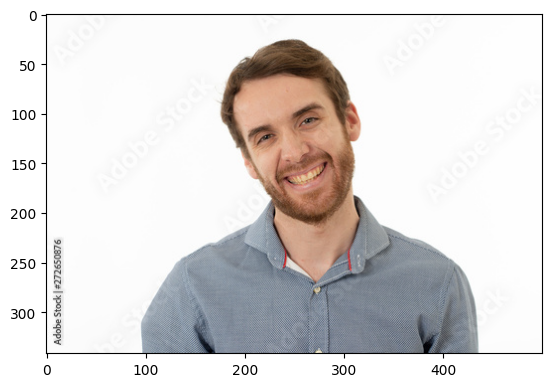

In [23]:
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt

path_img = "happy.jpg"
img = Image.open(path_img)

labels = ["angry", "happy", "excited"]

with torch.no_grad():

  image = image_transforms(img).unsqueeze(0)
  print(image.shape)
  texts = text_transform(labels)
  texts = nn.functional.pad(texts,(0,512-texts.size(-1)), value=0)

  image_features = zero_shot_model.encode_image(image, projection = True)[1]
  print(f"image feature , {image_features}")
  text_features = zero_shot_model.encode_text(texts, projection=True)[1]
  scores = image_features @ text_features.t()
  probs = torch.nn.Softmax(dim=-1)(scores)
  print(probs)
  label = labels[torch.argmax(probs)]

  print(f"Prediction label: {label}")


plt.imshow(img)
plt.show()
